# Drive loading and getting the datasets

In [4]:
from google.colab import drive
import os

In [5]:
drive_path = "/content/gdrive"
drive.mount(drive_path)
if os.path.exists(f'{drive_path}/MyDrive/medmnist'):
  !echo "Making root medmnist directory"
  !mkdir /root/.medmnist
  !echo "Copying medmnist data from drive to the root directory"
  !cp {os.path.join(drive_path,"MyDrive/medmnist/")+ "*"} /root/.medmnist/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Making root medmnist directory
mkdir: cannot create directory ‘/root/.medmnist’: File exists
Copying medmnist data from drive to the root directory


In [6]:
!pip install medmnist 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import medmnist
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
import numpy as np
from scipy.special import kl_div

# Plotting pixel values density for 3 different medMNIST datasets

### plotting for either train, val or test sets across  the datasets

In [8]:
# choose the datasets here
ds_names = ["dermamnist","bloodmnist","retinamnist"]
#choose split type : train / test / val 
split = "train"
# will contain dataclasses and (train/test/val) data info for each dataset name respectively (useless here ngl)
dataclasses = []
data =[]
# for plotting later 
prepared_data ={}
labels = []

In [9]:
#preparing each dataset for plotting 
for ds_name in ds_names:
    assert ds_name in ["pathmnist", "chestmnist", "dermamnist", "octmnist", "pneumoniamnist", "retinamnist", "breastmnist", "bloodmnist",
     "tissuemnist", "organamnist", "organcmnist", "organsmnist"], "Dataset's name is not correct"
    dataclass = getattr(medmnist, medmnist.INFO[ds_name]["python_class"])
    dataclasses.append(dataclass)
    data_ = dataclass(split=split, download=True)
    data.append(data_)
    prepared_data_ = data_.imgs.reshape(-1)
    prepared_data[ds_name] = prepared_data_

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/retinamnist.npz


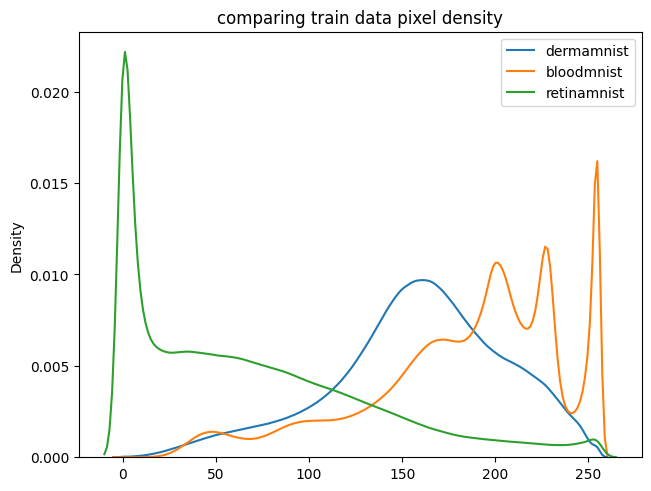

In [10]:
# Create a single subplot
fig, ax = plt.subplots(layout='constrained')

# Plot the kde plots and pass the labels to the label parameter
for key in prepared_data.keys():
    sns.kdeplot(prepared_data[key], fill=False, label=key, ax=ax)

# Add a legend to the plot
ax.set_title("comparing {} data pixel density".format(split))
ax.legend()

# Show the plot
plt.show()

# Kullback-Leibler (KL) divergence

In [12]:
def calculate_kl_divergence(data1, data2):
    bins = 100  # Number of bins for the histograms
    hist1, _ = np.histogram(data1, bins=bins, density=True)
    hist2, _ = np.histogram(data2, bins=bins, density=True)
    return kl_div(hist1, hist2).sum()

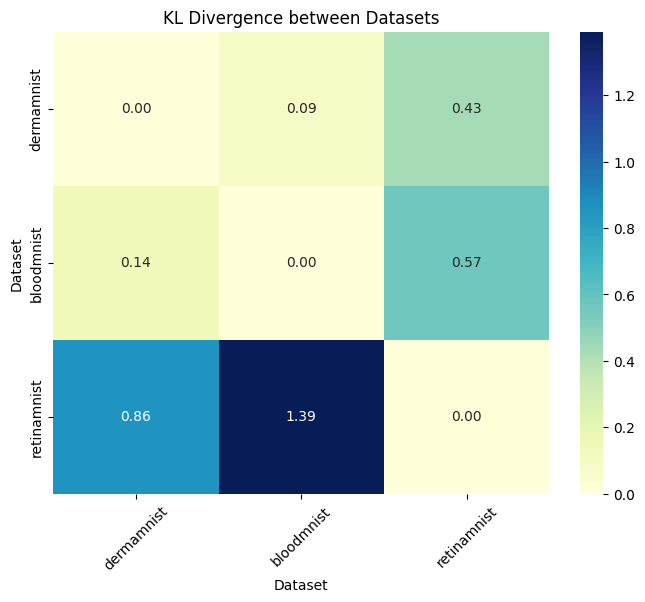

In [13]:
# Calculate KL divergence between datasets
kl_divergences = {}
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            ds1 = prepared_data[ds_names[i]]
            ds2 = prepared_data[ds_names[j]]
            kl_divergence = calculate_kl_divergence(ds1, ds2)
            key = ds_names[i] + " vs " + ds_names[j]
            kl_divergences[key] = kl_divergence

# Convert the KL divergence values to a 2D array
divergence_matrix = np.zeros((len(ds_names), len(ds_names)))
for i, name_i in enumerate(ds_names):
    for j, name_j in enumerate(ds_names):
        if i != j:
            key = name_i + " vs " + name_j
            divergence_matrix[i, j] = kl_divergences[key]

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(divergence_matrix, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=ds_names, yticklabels=ds_names, ax=ax)
ax.set_title("KL Divergence between Datasets")
ax.set_xlabel("Dataset")
ax.set_ylabel("Dataset")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

## checking the difference between Organ(a/c/s)MNIST 

In [1]:
# choose the datasets here
ds_names = ["organamnist","organcmnist","organsmnist"]
#choose split type : train / test / val 
split = "train"
# will contain dataclasses and (train/test/val) data info for each dataset name respectively (useless here ngl)
dataclasses = []
data =[]
# for plotting later 
prepared_data ={}
labels = []

In [ ]:
#preparing each dataset for plotting 
for ds_name in ds_names:
    assert ds_name in ["pathmnist", "chestmnist", "dermamnist", "octmnist", "pneumoniamnist", "retinamnist", "breastmnist", "bloodmnist",
     "tissuemnist", "organamnist", "organcmnist", "organsmnist"], "Dataset's name is not correct"
    dataclass = getattr(medmnist, medmnist.INFO[ds_name]["python_class"])
    dataclasses.append(dataclass)
    data_ = dataclass(split=split, download=True)
    data.append(data_)
    prepared_data_ = data_.imgs.reshape(-1)
    prepared_data[ds_name] = prepared_data_

100%|██████████| 38247903/38247903 [01:00<00:00, 634301.57it/s]


100%|██████████| 15527535/15527535 [00:25<00:00, 616219.39it/s]


100%|██████████| 16528536/16528536 [00:17<00:00, 968530.17it/s] 


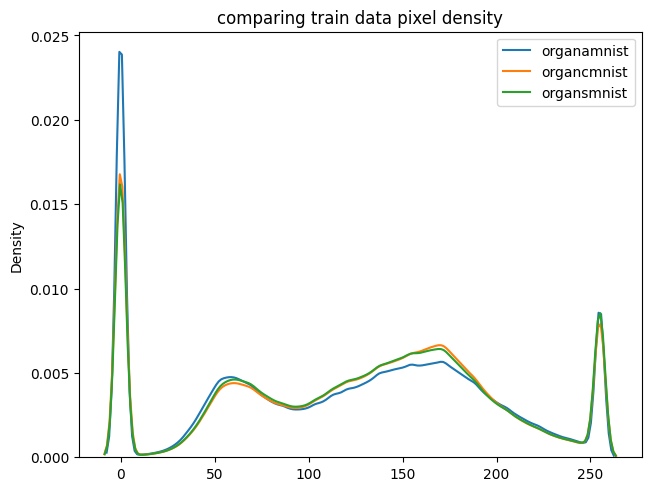

In [ ]:
# Create a single subplot
fig, ax = plt.subplots(layout='constrained')

# Plot the kde plots and pass the labels to the label parameter
for key in prepared_data.keys():
    sns.kdeplot(prepared_data[key], fill=False, label=key, ax=ax)

# Add a legend to the plot
ax.set_title("comparing {} data pixel density".format(split))
ax.legend()

# Show the plot
plt.show()

# Plotting pixel values density for the train, validation and test sets of one dataset

In [ ]:
# choose the dataset here
ds_name = "pathmnist"
#choose split type : train / test / val 
split = ["train","val","test"]
# for plotting later 
prepared_data ={}
labels = []

In [ ]:
#preparing each dataset for plotting 
assert ds_name in ["pathmnist", "chestmnist", "dermamnist", "octmnist", "pneumoniamnist", "retinamnist", "breastmnist", "bloodmnist",
     "tissuemnist", "organamnist", "organcmnist", "organsmnist"], "Dataset's name is not correct"
for split_type in split:
    dataclass = getattr(medmnist, medmnist.INFO[ds_name]["python_class"])
    data_ = dataclass(split=split_type, download=True)
    prepared_data_ = data_.imgs.reshape(-1)
    prepared_data[split_type] = prepared_data_

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


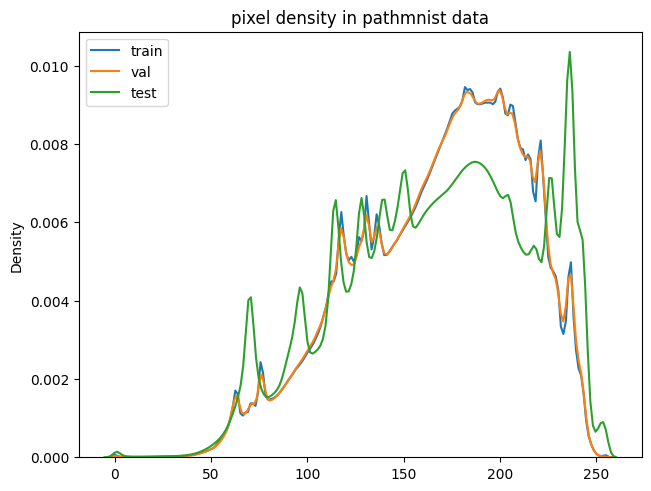

In [ ]:
# Create a single subplot
fig, ax = plt.subplots(layout='constrained')

# Plot the kde plots and pass the labels to the label parameter
for key in prepared_data.keys():
    sns.kdeplot(prepared_data[key], fill=False, label=key, ax=ax)

# Add a legend to the plot
ax.set_title("pixel density in {} data".format(ds_name))
ax.legend()

# Show the plot
plt.show()

In [10]:
if not os.path.exists(f'{drive_path}/MyDrive/medmnist'):
   !echo "Making root medmnist directory"
   !mkdir {drive_path + '/MyDrive/medmnist'}
   !echo "Copying medmnist data from computer to the drive"
   !cp /root/.medmnist/* {os.path.join(drive_path,"MyDrive/medmnist/")}